In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day29-sklearn-pipelines/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Strategy for pipeline

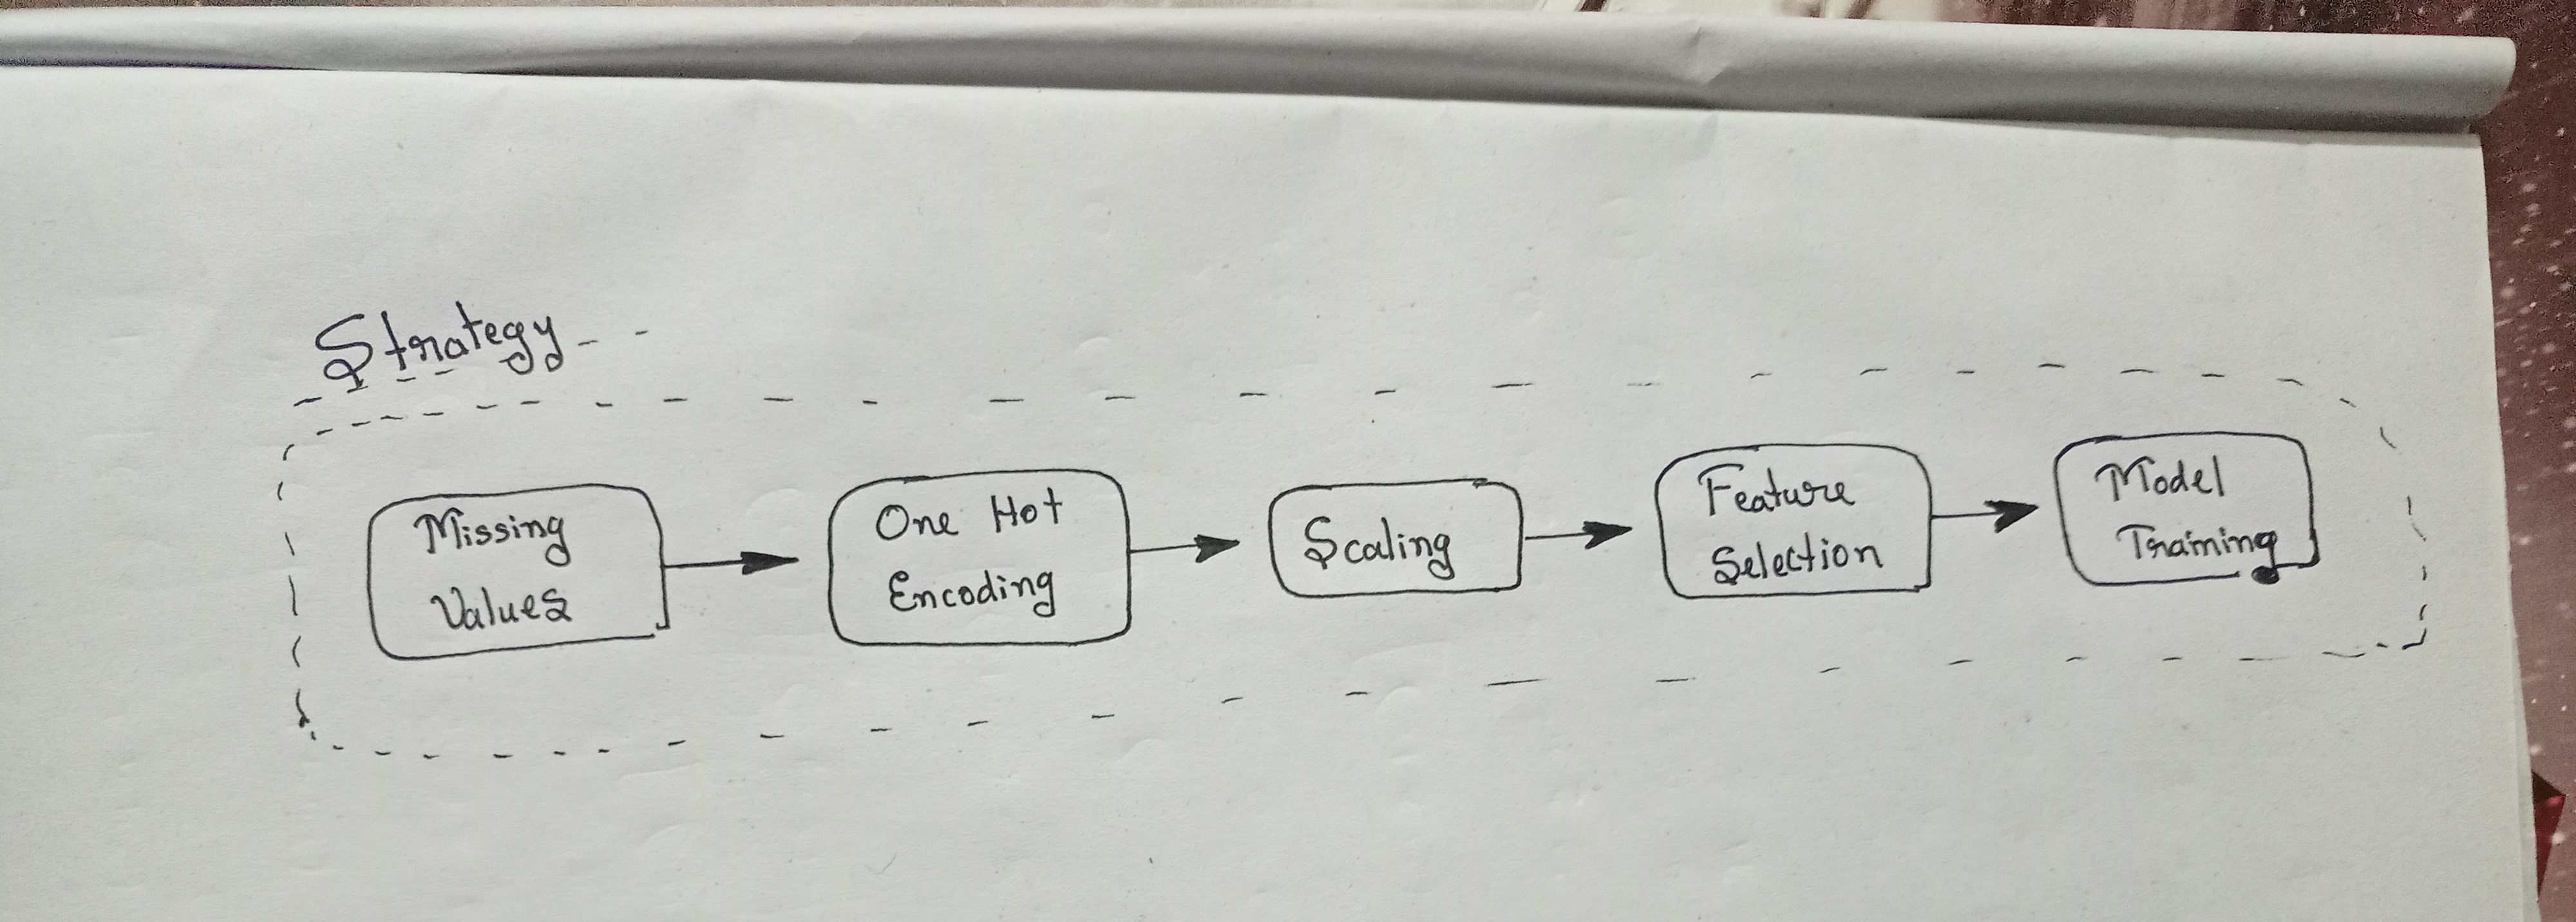

### Here the output of one box acts as the input of another box and since the output of each box is a np array instead of a dataframe, so if we use name of columns instead of index we will get error because output np array doesnot have column names

In [5]:
df.drop(columns = ["PassengerId","Name","Ticket","Cabin"], inplace = True)

### Train Test Split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ["Survived"]), df["Survived"],
                                                   random_state = 42, test_size = 0.2)

In [36]:
x_train["Sex"].value_counts()
x_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [21]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

So we have to impute Age and Embarked since they have null values

In [22]:
## Imputation transformer

trf1 = ColumnTransformer([
   ('age_imputer', SimpleImputer(),[2]), ## Here instead of passing column name we are passing column index
   ('embarked_imputer', SimpleImputer(strategy = "most_frequent"),[6]) 
], remainder = 'passthrough')

In [23]:
## OneHotEncoding Transformer

trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [29]:
##Feature Scaling Transformer

trf4 = ColumnTransformer([
   ('scaler', MinMaxScaler(), slice(0,10)) # Slice will select all the columns from index 0 to index 9
])

In [30]:
# Feature Selection 

trf5 = SelectKBest(score_func = chi2, k = 8)

In [31]:
# train the model

trf6 = DecisionTreeClassifier()

# Pipeline Creation

In [32]:
# In each tuple 1st argument is transformer name and 2nd argument is transformer object

pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf4',trf4),
    ('trf5',trf5),
    ('trf6',trf6)
])

In [33]:
# train

pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imputer',
                                                  SimpleImputer(), [2]),
                                                 ('embarked_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf4',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 10, None))])

# Exploring the pipeline

In [53]:
# This code is used to visualize the pipeline after training it
from sklearn import set_config
set_config(display = 'diagram')

In [54]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_imputer',
                                                  SimpleImputer(), [2]),
                                                 ('embarked_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf4',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf5',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x0000029855328940>)),
                ('trf6', DecisionTreeClassifier())])

## Predict

In [55]:
y_predicted = pipe.predict(x_test)

In [56]:
y_predicted

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [57]:
## In order to find all the steps
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('age_imputer', SimpleImputer(), [2]),
                                 ('embarked_imputer',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf4': ColumnTransformer(transformers=[('scaler', MinMaxScaler(), slice(0, 10, None))]),
 'trf5': SelectKBest(k=8, score_func=<function chi2 at 0x0000029855328940>),
 'trf6': DecisionTreeClassifier()}

In [58]:
pipe.named_steps['trf1']

ColumnTransformer(remainder='passthrough',
                  transformers=[('age_imputer', SimpleImputer(), [2]),
                                ('embarked_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 [6])])

In [59]:
pipe.named_steps['trf1'].transformers_

[('age_imputer', SimpleImputer(), [2]),
 ('embarked_imputer', SimpleImputer(strategy='most_frequent'), [6]),
 ('remainder', 'passthrough', [0, 1, 3, 4, 5])]

In [60]:
pipe.named_steps['trf1'].transformers_[0][1].statistics_

array([29.49884615])

## Check accuracy

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.6256983240223464

## Cross Validation Using Pipeline

In [68]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, df.drop(columns = ["Survived"]), df["Survived"],cv=5, scoring='accuracy').mean()

0.6364258364195594

## GridSearch using pipeline

In [66]:
# gridsearchcv
params = {
    'trf6__max_depth':[1,2,3,4,5,None]
}


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('age_imputer',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('embarked_imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf4',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf5',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x0000029855328940>)),
                                       ('trf6', DecisionTreeClassifier())]),
             param_grid={'trf6__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')